# MNIST Classification Project Demo

This notebook demonstrates the complete workflow of our MNIST classification project. In this demo, we will:

- Load and explore the MNIST dataset.
- Visualize sample images from the training and test sets.
- Plot the distribution of digit classes.
- Train and evaluate three different classifiers:
  - Random Forest (scikit‑learn)
  - Feed‑Forward Neural Network (PyTorch)
  - Convolutional Neural Network (PyTorch)
- View evaluation results including classification reports and confusion matrices.

In [6]:
# Import necessary libraries and modules
import numpy as np
import torch
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
 
# Import our custom modules
from loading_dataset import load_mnist, visualize_samples, plot_class_distribution
from result_plot import plot_metrics, plot_confusion_matrix
from mnist_classifier import MnistClassifier
from models.rf import MnistRFClassifier
from models.nn import MnistNNClassifier
from models.cnn import MnistCNNClassifier

# Load the MNIST dataset
X_train, y_train, X_test, y_test = load_mnist()

# Print basic dataset information
print("Training Images Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Images Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)
# Check available device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


## 1. Dataset Overview and Exploration

The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits.
Each image has a shape of 28x28 pixels. In the cells below, we will visualize sample images from both datasets and plot the class distribution.

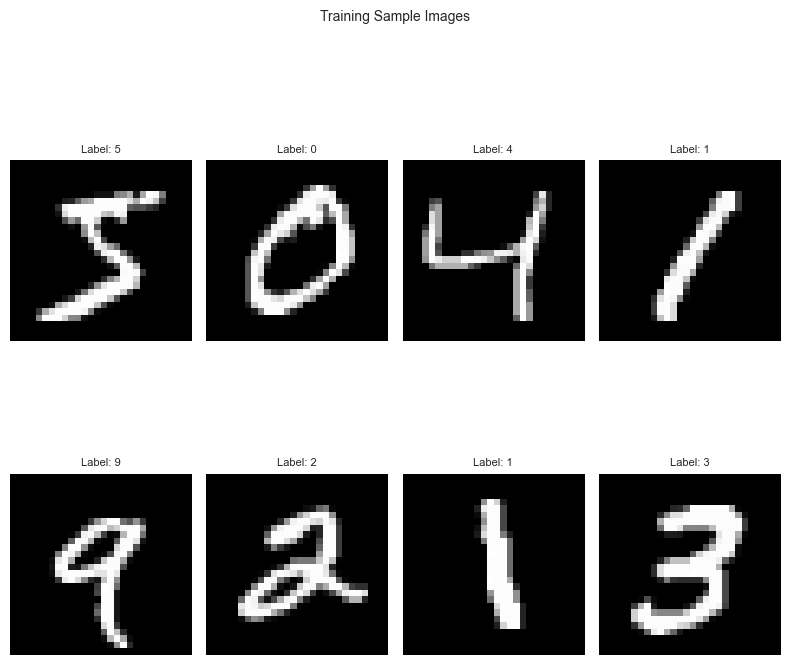

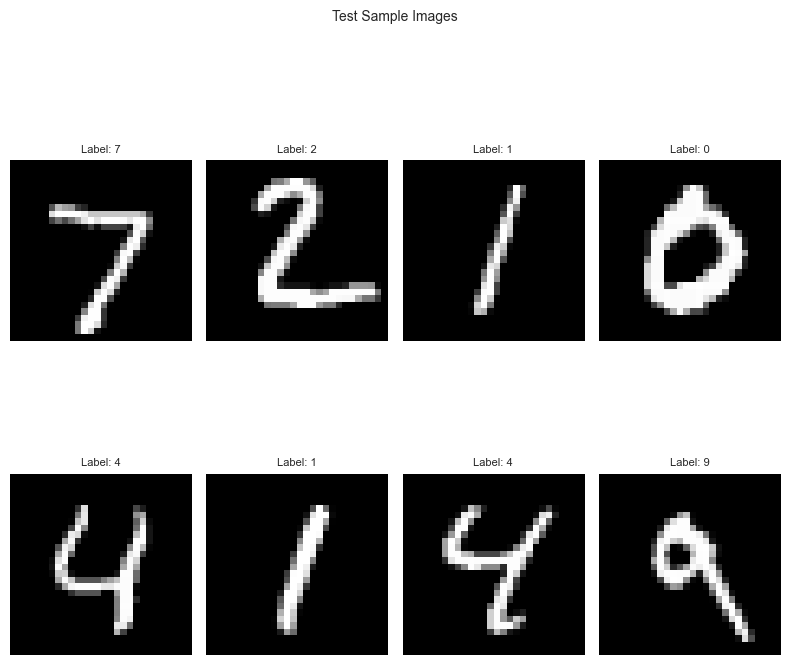

In [8]:
# Visualize 16 sample images from the training dataset
visualize_samples(X_train, y_train, dataset_name="Training")

# Visualize 16 sample images from the test dataset
visualize_samples(X_test, y_test, dataset_name="Test")

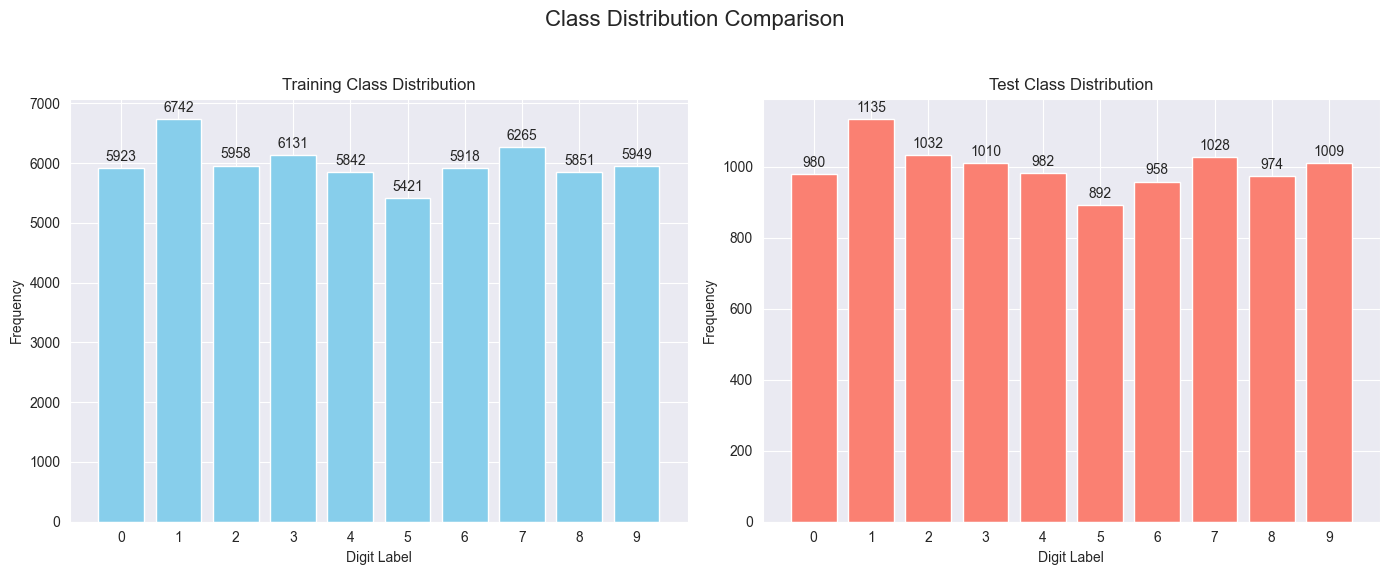

In [9]:
# Plot the combined class distribution for training and test datasets
plot_class_distribution(y_train, y_test)

## 2. Train and Evaluate Models

We now train and evaluate three classifiers using our unified interface. The `MnistClassifier` class accepts an algorithm name:
- `'rf'` for Random Forest
- `'nn'` for Feed‑Forward Neural Network
- `'cnn'` for Convolutional Neural Network

For each model, we train, evaluate (print accuracy and classification report), and plot performance metrics.

In [10]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a model by predicting labels on X_test, prints accuracy and classification report,
    and returns the predictions.
    """
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, predictions))
    return predictions

def model_realization(algo):
    """
    Evaluates a model using the unified MnistClassifier.
    
    Parameters:
      - algo: A string key representing the algorithm. For example, 'rf' for Random Forest,
              'nn' for Feed-Forward Neural Network, or 'cnn' for Convolutional Neural Network.
    """
    # Map algorithm codes to full model names
    models = {
        "rf": "Random Forest Classifier",
        "nn": "Feed-Forward Neural Network",
        "cnn": "Convolutional Neural Network"
    }
    print(f"\n=== {models[algo]} ===")
    classifier = MnistClassifier(algo, device=device)
    # Train the model; for RF, extra parameters (epochs, batch_size, etc.) will be ignored
    history = classifier.train(X_train, y_train, epochs=10, batch_size=128, X_val=X_test, y_val=y_test)
    predictions = evaluate_model(classifier, X_test, y_test, model_name=models[algo])
    # Plot training metrics (if available) and confusion matrix
    if history is not None:
        plot_metrics(history, models[algo])
    plot_confusion_matrix(y_test, predictions, models[algo])

 

## 3. Random Forest Classifier

We now train and evaluate the Random Forest classifier. This classifier uses a scikit‑learn implementation.


=== Random Forest Classifier ===
Random Forest Classifier Accuracy: 97.05%
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


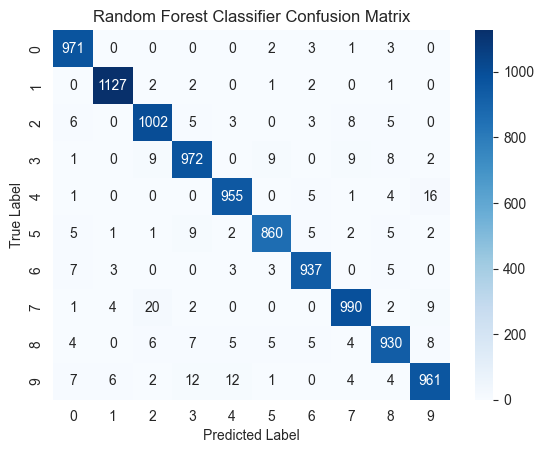

In [11]:
model_realization('rf') 

## 4. Feed‑Forward Neural Network

Next, we train and evaluate a simple feed‑forward neural network implemented in PyTorch.


=== Feed-Forward Neural Network ===
Epoch 1/10: Train Loss: 0.3320, Train Acc: 0.9061 | Val Loss: 0.1546, Val Acc: 0.9557
Epoch 2/10: Train Loss: 0.1376, Train Acc: 0.9597 | Val Loss: 0.1050, Val Acc: 0.9681
Epoch 3/10: Train Loss: 0.0942, Train Acc: 0.9720 | Val Loss: 0.0821, Val Acc: 0.9747
Epoch 4/10: Train Loss: 0.0712, Train Acc: 0.9785 | Val Loss: 0.0796, Val Acc: 0.9749
Epoch 5/10: Train Loss: 0.0578, Train Acc: 0.9819 | Val Loss: 0.0707, Val Acc: 0.9790
Epoch 6/10: Train Loss: 0.0454, Train Acc: 0.9858 | Val Loss: 0.0673, Val Acc: 0.9776
Epoch 7/10: Train Loss: 0.0377, Train Acc: 0.9889 | Val Loss: 0.0612, Val Acc: 0.9809
Epoch 8/10: Train Loss: 0.0321, Train Acc: 0.9905 | Val Loss: 0.0644, Val Acc: 0.9802
Epoch 9/10: Train Loss: 0.0265, Train Acc: 0.9919 | Val Loss: 0.0562, Val Acc: 0.9824
Epoch 10/10: Train Loss: 0.0237, Train Acc: 0.9927 | Val Loss: 0.0644, Val Acc: 0.9815
Feed-Forward Neural Network Accuracy: 98.15%
Feed-Forward Neural Network Classification Report:
      

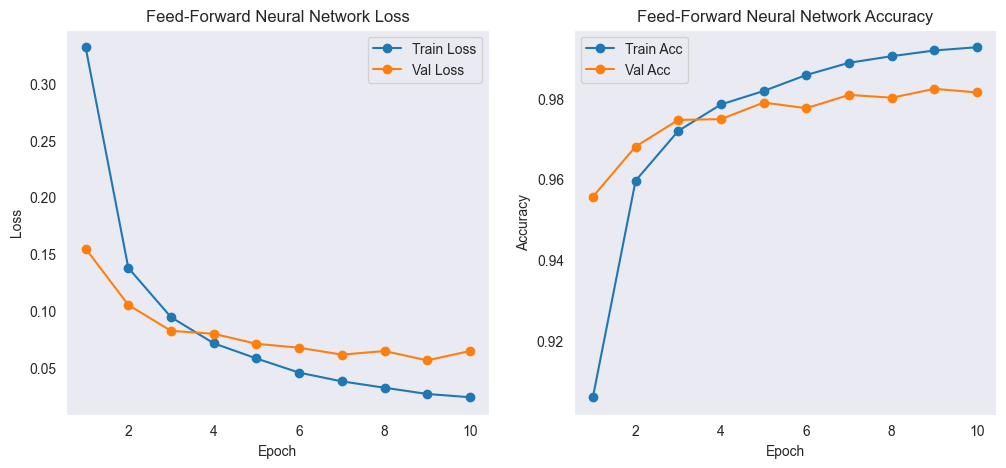

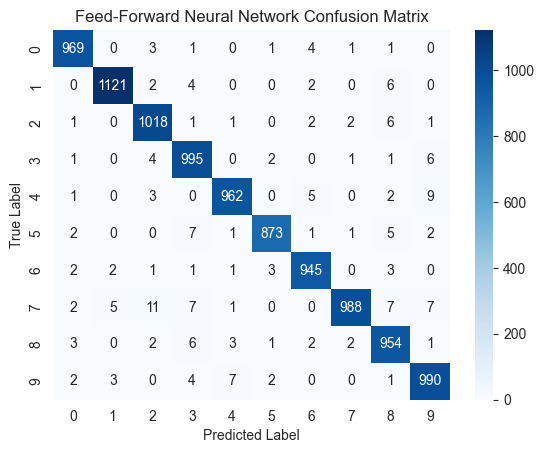

In [12]:
model_realization('nn') 

## 5. Convolutional Neural Network

Finally, we train and evaluate a convolutional neural network (CNN), which is typically more effective for image classification tasks.


=== Convolutional Neural Network ===
Epoch 1/10: Train Loss: 0.2764, Train Acc: 0.9190 | Val Loss: 0.1094, Val Acc: 0.9672
Epoch 2/10: Train Loss: 0.0943, Train Acc: 0.9716 | Val Loss: 0.0675, Val Acc: 0.9781
Epoch 3/10: Train Loss: 0.0702, Train Acc: 0.9790 | Val Loss: 0.0504, Val Acc: 0.9822
Epoch 4/10: Train Loss: 0.0530, Train Acc: 0.9836 | Val Loss: 0.0440, Val Acc: 0.9843
Epoch 5/10: Train Loss: 0.0448, Train Acc: 0.9867 | Val Loss: 0.0407, Val Acc: 0.9862
Epoch 6/10: Train Loss: 0.0385, Train Acc: 0.9878 | Val Loss: 0.0384, Val Acc: 0.9868
Epoch 7/10: Train Loss: 0.0323, Train Acc: 0.9896 | Val Loss: 0.0393, Val Acc: 0.9863
Epoch 8/10: Train Loss: 0.0275, Train Acc: 0.9912 | Val Loss: 0.0364, Val Acc: 0.9875
Epoch 9/10: Train Loss: 0.0236, Train Acc: 0.9925 | Val Loss: 0.0393, Val Acc: 0.9873
Epoch 10/10: Train Loss: 0.0198, Train Acc: 0.9938 | Val Loss: 0.0353, Val Acc: 0.9879
Convolutional Neural Network Accuracy: 98.79%
Convolutional Neural Network Classification Report:
   

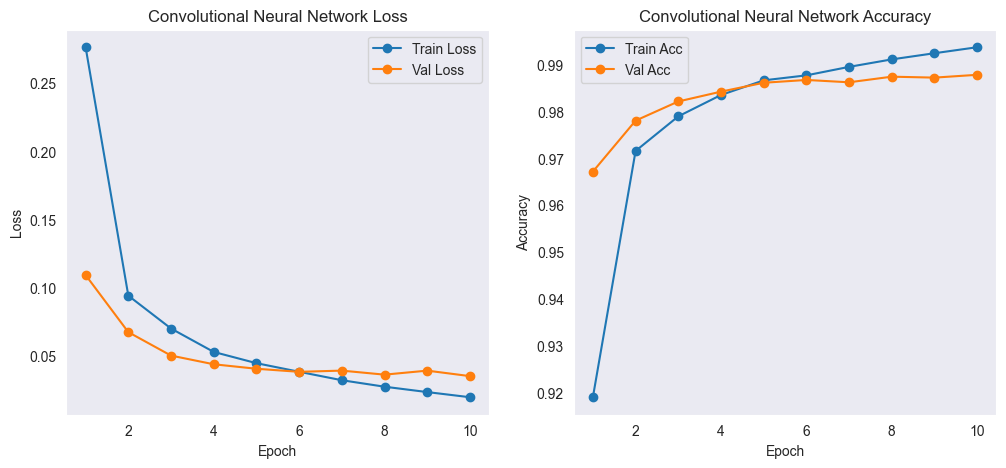

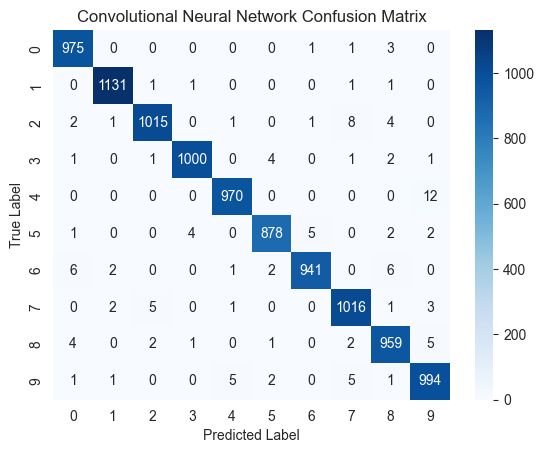

In [13]:
model_realization('cnn') 

## 6. Conclusion

In this notebook, we have:
- Loaded and explored the MNIST dataset.
- Visualized sample images and class distributions.
- Trained and evaluated three different classifiers:
  - Random Forest
  - Feed‑Forward Neural Network
  - Convolutional Neural Network

The CNN generally performs best on image data due to its ability to capture spatial hierarchies. You can further experiment with model parameters, architectures, or training epochs to optimize performance.